![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils import resample

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [ ]:
# Celda 1.1
season_desc = bikes['season'].describe()
print("Análisis descriptivo de 'season':\n", season_desc)
print("Valores únicos de 'season':", bikes['season'].unique())

Análisis descriptivo de 'season':
 count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64
Valores únicos de 'season': [1 2 3 4]


In [12]:
conteo_season = bikes['season'].value_counts()
print("Conteo de cada categoría en 'season':")
print(conteo_season)

Conteo de cada categoría en 'season':
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64


Analísis de la variable: 
- tiene 4 valores únicos (1, 2, 3, 4) sin valores atipicos
- los 4 valores tienen similares cantidades por lo que la variable esta valanceada
- variable categorica, representa las estaciones del año

In [9]:
# Celda 1.2
hour_desc = bikes['hour'].describe()
print("\nAnálisis descriptivo de 'hour':\n", hour_desc)
print("Valores únicos de 'hour':", bikes['hour'].unique())


Análisis descriptivo de 'hour':
 count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64
Valores únicos de 'hour': [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [14]:
conteo_hour = bikes['hour'].value_counts()
print("Conteo de cada categoría en 'hour':")
print(conteo_hour)

Conteo de cada categoría en 'hour':
hour
12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: count, dtype: int64


Analísis de la variable: 
- variable discreta en valores naturales
- representa las hora del día que se rento una bicicleta dentro del df
- los valores tienen similares cantidades por lo que la variable esta valanceada

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

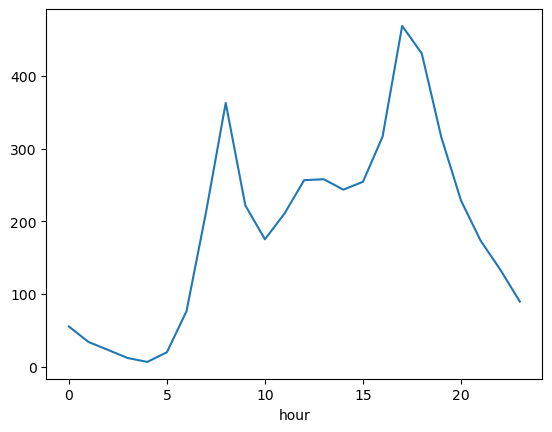

In [15]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: title={'center': 'Promedio de bicicletas rentadas en invierno por hora'}, xlabel='hour'>

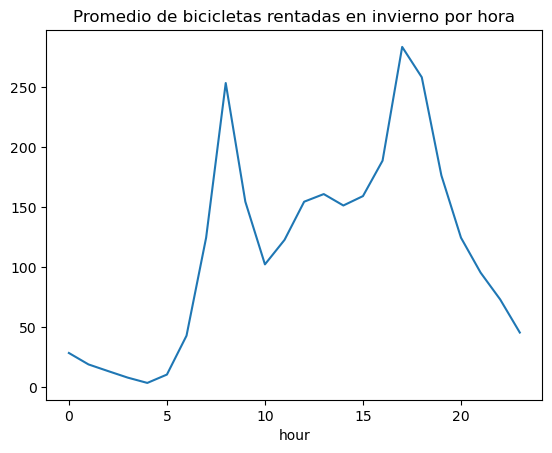

In [23]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes.loc[bikes['season'] == 1].groupby('hour').total.mean().plot(title='Promedio de bicicletas rentadas en invierno por hora')

<Axes: title={'center': 'Promedio de bicicletas rentadas en verano por hora'}, xlabel='hour'>

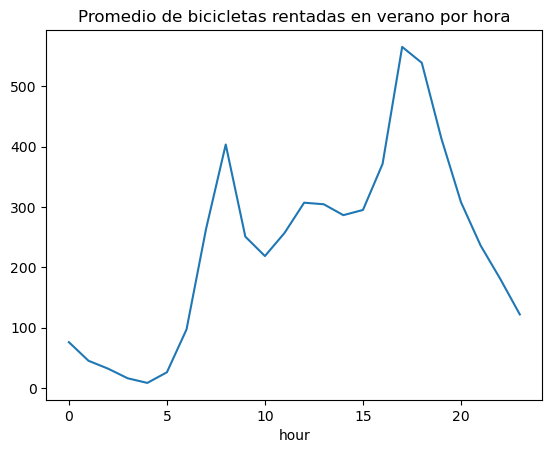

In [24]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes.loc[bikes['season'] == 3].groupby('hour').total.mean().plot(title='Promedio de bicicletas rentadas en verano por hora')

Analísis: 
- La distribución es similar para ambas estaciones
- En verano el promedio de bicicletas rentadas es aproximadamente el doble

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a un conjunto de train de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [80]:
# Celda 3
df = bikes.reset_index().loc[:,['total','season','hour']].copy()

df_dummies = pd.get_dummies(df, columns=['season'])

X = df_dummies.drop(columns=['total'])
y = df_dummies['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 25409.920498970598


In [48]:

print("Intercepto:", modelo.intercept_)
print("Coeficientes:")
for nombre, valor in zip(X.columns, modelo.coef_):
    print(nombre, ":", valor)

Intercepto: 69.10490583535753
Coeficientes:
hour : 10.569619077185346
season_1 : -75.02445317731943
season_2 : 24.082217538385834
season_3 : 41.02188682061121
season_4 : 9.920348818322402


Analísis: 
- El intercepto, cuando todas las variables es 0 es de 69.10 bicicletas rentadas
- Cada hora agrega un 10 bicicletas al total 
- Si la estación es invierno resta aprox 75 bicicletas del total
- Las otras estaciónes aportan al total de bicicletas en renta, de estas la estación de verano es la que más aporta al total. 

Interpretación:
- Sabemos que la distribución de la variable hour no es lineal por lo que falla el modelo al representar por ejemplo las horas nocturnas
- Aunque se usa dommie para manejar las variables categoricas sin un sesgo númeríco el modelo lineal no necesariamente van a representar bien las estacionalidades o distribuciones de la variable categorica. 

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [88]:
# Celda 4


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Tenga en cuenta que, a diferencia del laboratorio, este problema es de regresión. Por lo tanto, para hacer cada split del árbol se debe utilizar algún criterio apropiado para problemas de regresión.

In [ ]:
# Celda 5
df = bikes.reset_index().loc[:,['total','season','hour']].copy()

X = df.drop(columns=["total"])
y = df["total"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

arbol = DecisionTreeRegressor(random_state=42)
parametros = {
    "max_depth": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 5, 10]
}

grid = GridSearchCV(arbol, param_grid=parametros, cv=5, scoring="neg_mean_squared_error")
grid.fit(X_train, y_train)
mejor_modelo = grid.best_estimator_

print("Mejores hiperparámetros:", grid.best_params_)



Mejores hiperparámetros: {'max_depth': 8, 'min_samples_leaf': 1}


In [46]:
# 6. Evaluar desempeño en conjunto de validación
y_pred = mejor_modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE del mejor modelo:", mse)

MSE del mejor modelo: 13464.749112666655


Analísis: 
- Luego de validar diferentes entrenamientos y modelos de arbol el mejor de los modelos obtuvo un MSE de 13464, mucho menor que el MSE del modelo lineal 25409
- los hiperparametros con mejor desempeño fuerón: {'max_depth': 8, 'min_samples_leaf': 1}

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [49]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [50]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [51]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 6
arbol = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": [2, 4, 6, None]
}
grid = GridSearchCV(arbol, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
mejor_arbol = grid.best_estimator_

logreg = LogisticRegression(random_state=42, max_iter=1000)
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] 
}

grid_logreg = GridSearchCV(logreg, param_grid=param_grid_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)
mejor_logreg = grid_logreg.best_estimator_




In [58]:
y_pred_arbol = mejor_arbol.predict(X_test)
acc_arbol = accuracy_score(y_test, y_pred_arbol)
f1_arbol = f1_score(y_test, y_pred_arbol)

print("Mejor 'max_depth' para el Árbol:", grid.best_params_)
print("Accuracy Árbol:", acc_arbol)
print("F1-Score Árbol:", f1_arbol)

Mejor 'max_depth' para el Árbol: {'max_depth': 2}
Accuracy Árbol: 0.6453333333333333
F1-Score Árbol: 0.6448598130841121


In [59]:
y_pred_logreg = mejor_logreg.predict(X_test)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print("Mejores hiperparámetros para Regresión Logística:", grid_logreg.best_params_)
print("Accuracy Regresión Logística:", acc_logreg)
print("F1-Score Regresión Logística:", f1_logreg)

Mejores hiperparámetros para Regresión Logística: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy Regresión Logística: 0.6433333333333333
F1-Score Regresión Logística: 0.6338124572210814


Analísis:
- ambas metodologías tienen un desempeño similar para los mejores modelos

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras de bootstrap vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras de bootstrap vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras de bootstrap vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [69]:
# Celda 7
# Definición de funciones 
def bagging_ensemble(base_model, N, X_train, y_train):
    modelos = []
    n_samples = X_train.shape[0]
    for i in range(N):
        X_boot, y_boot = resample(X_train, y_train, replace=True, n_samples=n_samples, random_state=i)
        m = base_model()
        m.fit(X_boot, y_boot)
        modelos.append(m)
    return modelos

def majority_vote_predict(ensemble, X_data):
    preds = [model.predict(X_data) for model in ensemble]  # lista de predicciones para cada modelo
    preds_array = np.array(preds)  # array de preciciones por modelo

    majority_preds = (preds_array.mean(axis=0) >= 0.5).astype(int) # si el promedio de 1's > 0.5 => 1, si no => 0 por redondeo del astype int
    return majority_preds

In [63]:
N1 = 100  # primer grupo: decision trees con max_depth
N2 = 100  # segundo grupo: decision trees con min_samples_leaf
N3 = 100  # tercer grupo: logistic regressions

# 1. Modelos de árbol con max_depth=4 (como ejemplo)
def arbol_depth():
    return DecisionTreeClassifier(max_depth=4, random_state=42)

ens_arbol_depth = bagging_ensemble(arbol_depth, N1, X_train, y_train)

# 2. Modelos de árbol con min_samples_leaf=5 (como ejemplo)
def arbol_minleaf():
    return DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

ens_arbol_minleaf = bagging_ensemble(arbol_minleaf, N2, X_train, y_train)

# 3. Modelos de regresión logística
def logreg_model():
    return LogisticRegression(random_state=42, max_iter=1000)

ens_logreg = bagging_ensemble(logreg_model, N3, X_train, y_train)

Metricas para cada grupo

In [ ]:
preds_arbol_depth = majority_vote_predict(ens_arbol_depth, X_test)
acc_a_depth = accuracy_score(y_test, preds_arbol_depth)
f1_a_depth = f1_score(y_test, preds_arbol_depth)

print("== Árbol (max_depth) ==")
print("Accuracy:", acc_a_depth)
print("F1-Score:", f1_a_depth)

== Árbol (max_depth) ==
Accuracy: 0.6466666666666666
F1-Score: 0.6384720327421556


In [66]:
preds_arbol_minleaf = majority_vote_predict(ens_arbol_minleaf, X_test)
acc_a_minleaf = accuracy_score(y_test, preds_arbol_minleaf)
f1_a_minleaf = f1_score(y_test, preds_arbol_minleaf)

print("\n== Árbol (min_samples_leaf) ==")
print("Accuracy:", acc_a_minleaf)
print("F1-Score:", f1_a_minleaf)


== Árbol (min_samples_leaf) ==
Accuracy: 0.6506666666666666
F1-Score: 0.6525198938992044


In [67]:
preds_logreg = majority_vote_predict(ens_logreg, X_test)
acc_logreg = accuracy_score(y_test, preds_logreg)
f1_logreg = f1_score(y_test, preds_logreg)

print("\n== Regresión Logística (bagged) ==")
print("Accuracy:", acc_logreg)
print("F1-Score:", f1_logreg)


== Regresión Logística (bagged) ==
Accuracy: 0.6186666666666667
F1-Score: 0.6071428571428572


Ensamble final

In [68]:
tods_los_modelos = ens_arbol_depth + ens_arbol_minleaf + ens_logreg  # lista total de 300 modelos
preds_300 = majority_vote_predict(tods_los_modelos, X_test)
acc_300 = accuracy_score(y_test, preds_300)
f1_300 = f1_score(y_test, preds_300)

print("\n== Ensamble final (300 modelos) ==")
print("Accuracy:", acc_300)
print("F1-Score:", f1_300)


== Ensamble final (300 modelos) ==
Accuracy: 0.6353333333333333
F1-Score: 0.6266211604095563


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [70]:
# Celda 8

def weighted_vote_predict(ens1, ens2, ens3, X_data, w1=1.0, w2=1.0, w3=1.0):

    preds1 = np.array([m.predict(X_data) for m in ens1])
    preds2 = np.array([m.predict(X_data) for m in ens2])
    preds3 = np.array([m.predict(X_data) for m in ens3])

    # Suma el total de prediccioens para cada esnsamble de 100 modelos
    sum_preds1 = preds1.sum(axis=0)  
    sum_preds2 = preds2.sum(axis=0)
    sum_preds3 = preds3.sum(axis=0)

    weighted_sum = w1 * sum_preds1 + w2 * sum_preds2 + w3 * sum_preds3 # Pondera el resultado de cada modelo por un peso dado

    threshold = 0.5 * (w1 + w2 + w3) * 100 # Se calcula el umbal de 0.5 para dar una respuesta final

    final_preds = (weighted_sum >= threshold).astype(int) # validación true-false pasada a entero
    return final_preds

In [73]:
w1, w2, w3 = 1, 2, 3  # asigna pesos
preds_ponderada = weighted_vote_predict(ens_arbol_depth, ens_arbol_minleaf, ens_logreg,
                                        X_test, w1, w2, w3)

acc_pond = accuracy_score(y_test, preds_ponderada)
f1_pond  = f1_score(y_test, preds_ponderada)

print("\n== Ensamble final (votación ponderada) ==")
print(f"Pesos: w1={w1}, w2={w2}, w3={w3}")
print("Accuracy:", acc_pond, " - F1-Score:", f1_pond)


== Ensamble final (votación ponderada) ==
Pesos: w1=1, w2=2, w3=3
Accuracy: 0.618  - F1-Score: 0.6072652501713502


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [76]:
# Celda 9
# El ensamble por votación se comportó mejor respecto al ensamble por scroring, sin embargo los pesos aún pueden ser optimizados
# Caracteristicas del mentodo votación: 
# - No se puede saber cual de los 3 grupos es mejor predictor
# - Es más facíl de entender 
# - No tiene obcioens de optimización diferentes al threshold 
# Caracteristicas del metodo ponderado: 
# - Es más facíl entender la participación de cada grupo de modelos
# - Se puede optimizar jugando con los pesos de cada modelo y se puede jugar con el threshold